# Problem
Predicting the sales price of bulldozers in the future given sales and model data of previously sold bulldozers.

[Blue Book for Bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview)

# Data


*   Train.csv is the training set, which contains data through the end of 2011.
*   Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
*   Test.csv contains data from May 1, 2012 - November 2012.
* ValidSolution.csv contains SalePrice for Valid.csv
* There is no "solution" for the test data.






# Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
train_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/Train.csv", low_memory=False)
valid_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/Valid.csv", low_memory=False)
valid_sol_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/ValidSolution.csv", low_memory=False)
test_csv = pd.read_csv("/content/drive/MyDrive/ML_Project/Dataset/Test.csv", low_memory=False)

In [ ]:
pd.set_option('display.max_columns', None)
print("What the data looks like: ")
train_csv.head()

What the data looks like: 


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Statistics for numeric data in the training set: ")
train_csv.describe()

Statistics for numeric data in the training set: 


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [ ]:
print("Count of non numeric data in the training set")
non_numeric_columns = train_csv.select_dtypes(exclude='number')
print(non_numeric_columns.shape[1])

print("Number of null values in the training set")
null_counts = train_csv.isnull().sum()
null_counts

Count of non numeric data in the training set
45
Number of null values in the training set


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

It is pretty self evident that the training data needs expansive normalization. Null values need to be dealt with, categorical labels need to be encoded and errors like a machine being made in the year 401125 (shown in the train data stats table) need to be corrected.

# Data Preprocessing

## Filling in numeric missing values

In [ ]:
print("Numeric columns that contain null values: ")
numeric_columns = train_csv.select_dtypes(include='number').columns
for col in numeric_columns:
  if train_csv[col].isnull().any():
    print(col)

Numeric columns that contain null values: 
auctioneerID
MachineHoursCurrentMeter


Since this notebook is supposed to essentially be the "control" approach, I will be utilizing the simplest and/or most common data imputation methods. For numeric missing values, this is simply **replacing the missing data with the mean** of the feature column the data belongs to. In the extensive preprocessing approach, I will explain why this might not be the best idea.

## Data Errors

One glaring error that can be identified within the data is that the minimum of YearMade is 1000 (look at yearmade minimum in statistics cell). This of course shouldn't be possible and needs to be rectified, however for the control approach **I will be ignoring this obvious outlier/error**.

## Correctly using ***saledate***

The saledate data is in the form mm/dd/yyy. This is not very useful as it is and can be seperated into month, day and year. This conversion also allows for easier input into a machine learning model. Using the saledate as it is would require it to be encoded since it is a string in the dataset and information might be lost or not as well represented. This is exactly what I will be doing for the control approach!

## Non Numeric Data Conversion and Filling

A large part of the dataset is non numeric or categoric. This should be encoded and imputed using a sensible strategy. For this control approach however, **I will be simply converting the categoric columns into codes using the Categorical class in pandas**. It assigns integer codes to each unique category in the order they appear in the original data unless a custom order is specified. The assignment of codes is based on the order of appearance, and it follows the principle of preserving the original order of categories. This is the simplest encoding scheme and is fairly memory effecient compared to something like memory encoding when it comes to encoding a large dataset, however it may not be the best for encoding nominal categorical data since the codes may cause a regression model to interpret a hierachry where there is none. For ordinal categorical data this issue should not be a problem. In the extensive pre processing approach, both nominal and ordinal data should be dealt with seperately with keeping in mind their differences.

In [10]:
from sklearn.preprocessing import MinMaxScaler

def preprocess(data, test, val):

  # Impute auctioneerID and MachineHoursCurrentMeter using column mean
  data['auctioneerID'].fillna(data['auctioneerID'].mean(), inplace=True)
  data['MachineHoursCurrentMeter'].fillna(data['MachineHoursCurrentMeter'].mean(), inplace=True)

  # Use pandas.Categorical codes to encode non numeric data
  for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes

  if not test:
    target_col = "SalePrice"
    y = data[target_col]

  feature_col_names = list(data.columns)
  if not test:
    feature_col_names.remove("SalePrice")

  X = data[feature_col_names].copy()
  # scale features to bring into bounded range for faster convergence
  scaler = MinMaxScaler()
  X.loc[:, feature_col_names] = scaler.fit_transform(X.loc[:, feature_col_names])
  if not test:
    return X, y
  else:
    return X

X_train, y_train = preprocess(train_csv, False, False)
# SalesPrice is missing from valid_csv and has to be added from ValidSolution
valid_csv['SalePrice'] = valid_sol_csv['SalePrice']
X_val, y_val = preprocess(valid_csv, False, True)
X_test = preprocess(test_csv, True, False)


In [11]:
# Check if any missing data still remains
print("Null values in train: ")
print(X_train.isnull().sum())
print("Null values in validation: ")
print(X_val.isnull().sum())
print("Null values in test: ")
print(X_test.isnull().sum())

Null values in train: 
SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock        

# Regression


## Simple Linear Regression

Simple Linear Regression simply fits a regression line to the data, it does not deal with potential overfitting, it does not perform any inherent feature selection and it does not deal with multicolinear data, however it is the most easily interpretable and usable and hence will serve as essentially the baseline for comparison with other regression techniques.

I will be using the r2 score (coefficient of determination) as an evaluation metric  [[Top Evaluation Metrics for Regression](https://www.freecodecamp.org/news/evaluation-metrics-for-regression-problems-machine-learning/)].
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case, a constant model that always predicts the average y disregarding the input features would get a score of 0.0. I will also use the the mean absolute error as another evaluation metric as it gives equal weight to all errors and is less sensitive to outliers. Both metrics can also be used for comparison between regression techniques.

### Training and Evaluation

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
## Linear Regression using default parameters
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predicted_vals = lin_reg.predict(X_val)
r2_lin = r2_score(y_val, predicted_vals)
mae_lin = mean_absolute_error(y_val, predicted_vals)
print("R2 Score:", r2_lin)
print("MAE:", mae_lin)

R2 Score: 0.3185406927118648
MAE: 15795.083879887889


## Ridge Regression

Ridge Regression is a linear regression technique that extends ordinary least squares regression by introducing a regularization term to the objective function. The primary purpose of Ridge Regression is to address the issue of multicollinearity in the feature variables and to prevent overfitting, especially when the number of features is large relative to the number of observations. It shrinks features coeffecients towards zero but does not allow them to become exactly zero, hence it can be useful for us since it is possible that some features in our dataset might be more important than others and the less important features might still have a little bit of predictive power.

I will be going over a range of alphas [0.1 - 1000] in order to find the optimal alpha. Alpha is a constant that multiplies the L2 term, controlling regularization strength.

### Training and Evaluation

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2_vals = []
mae_vals = []
alphas = np.logspace(-1, 3, 100)
coeffs = []
# Finding best alpha
for alpha in alphas:
  ridge = Ridge(alpha)
  ridge.fit(X_train, y_train)
  predicted_val = ridge.predict(X_val)
  r2_vals.append(r2_score(y_val, predicted_val))
  mae_vals.append(mean_absolute_error(y_val, predicted_val))
  coeffs.append(ridge.coef_)

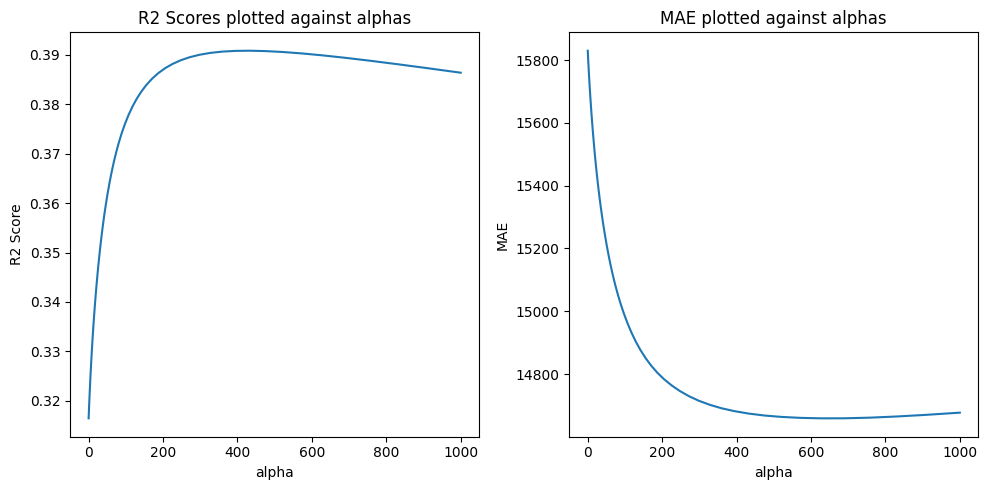

Best alpha:  432.87612810830615
Best r2: 0.39084745590862424
Best mae: 14658.941828127303


In [30]:
# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, r2_vals, label='R2 Scores')
plt.xlabel("alpha")
plt.ylabel("R2 Score")
plt.title("R2 Scores plotted against alphas")

plt.subplot(1, 2, 2)
plt.plot(alphas, mae_vals, label='MAE')
plt.xlabel("alpha")
plt.ylabel("MAE")
plt.title("MAE plotted against alphas")

plt.tight_layout()
plt.show()
r2_best_ridge= max(r2_vals)
r2_best_index = r2_vals.index(r2_best_ridge)
mae_best_ridge = min(mae_vals)
mae__best_index = mae_vals.index(mae_best_ridge)
alpha_best_ridge = alphas[r2_best_index]
print("Best alpha: ", alpha_best_ridge)
print("Best r2:", r2_best_ridge)
print("Best mae:", mae_best_ridge)

### Feature Importance Chart

Feature importance chart


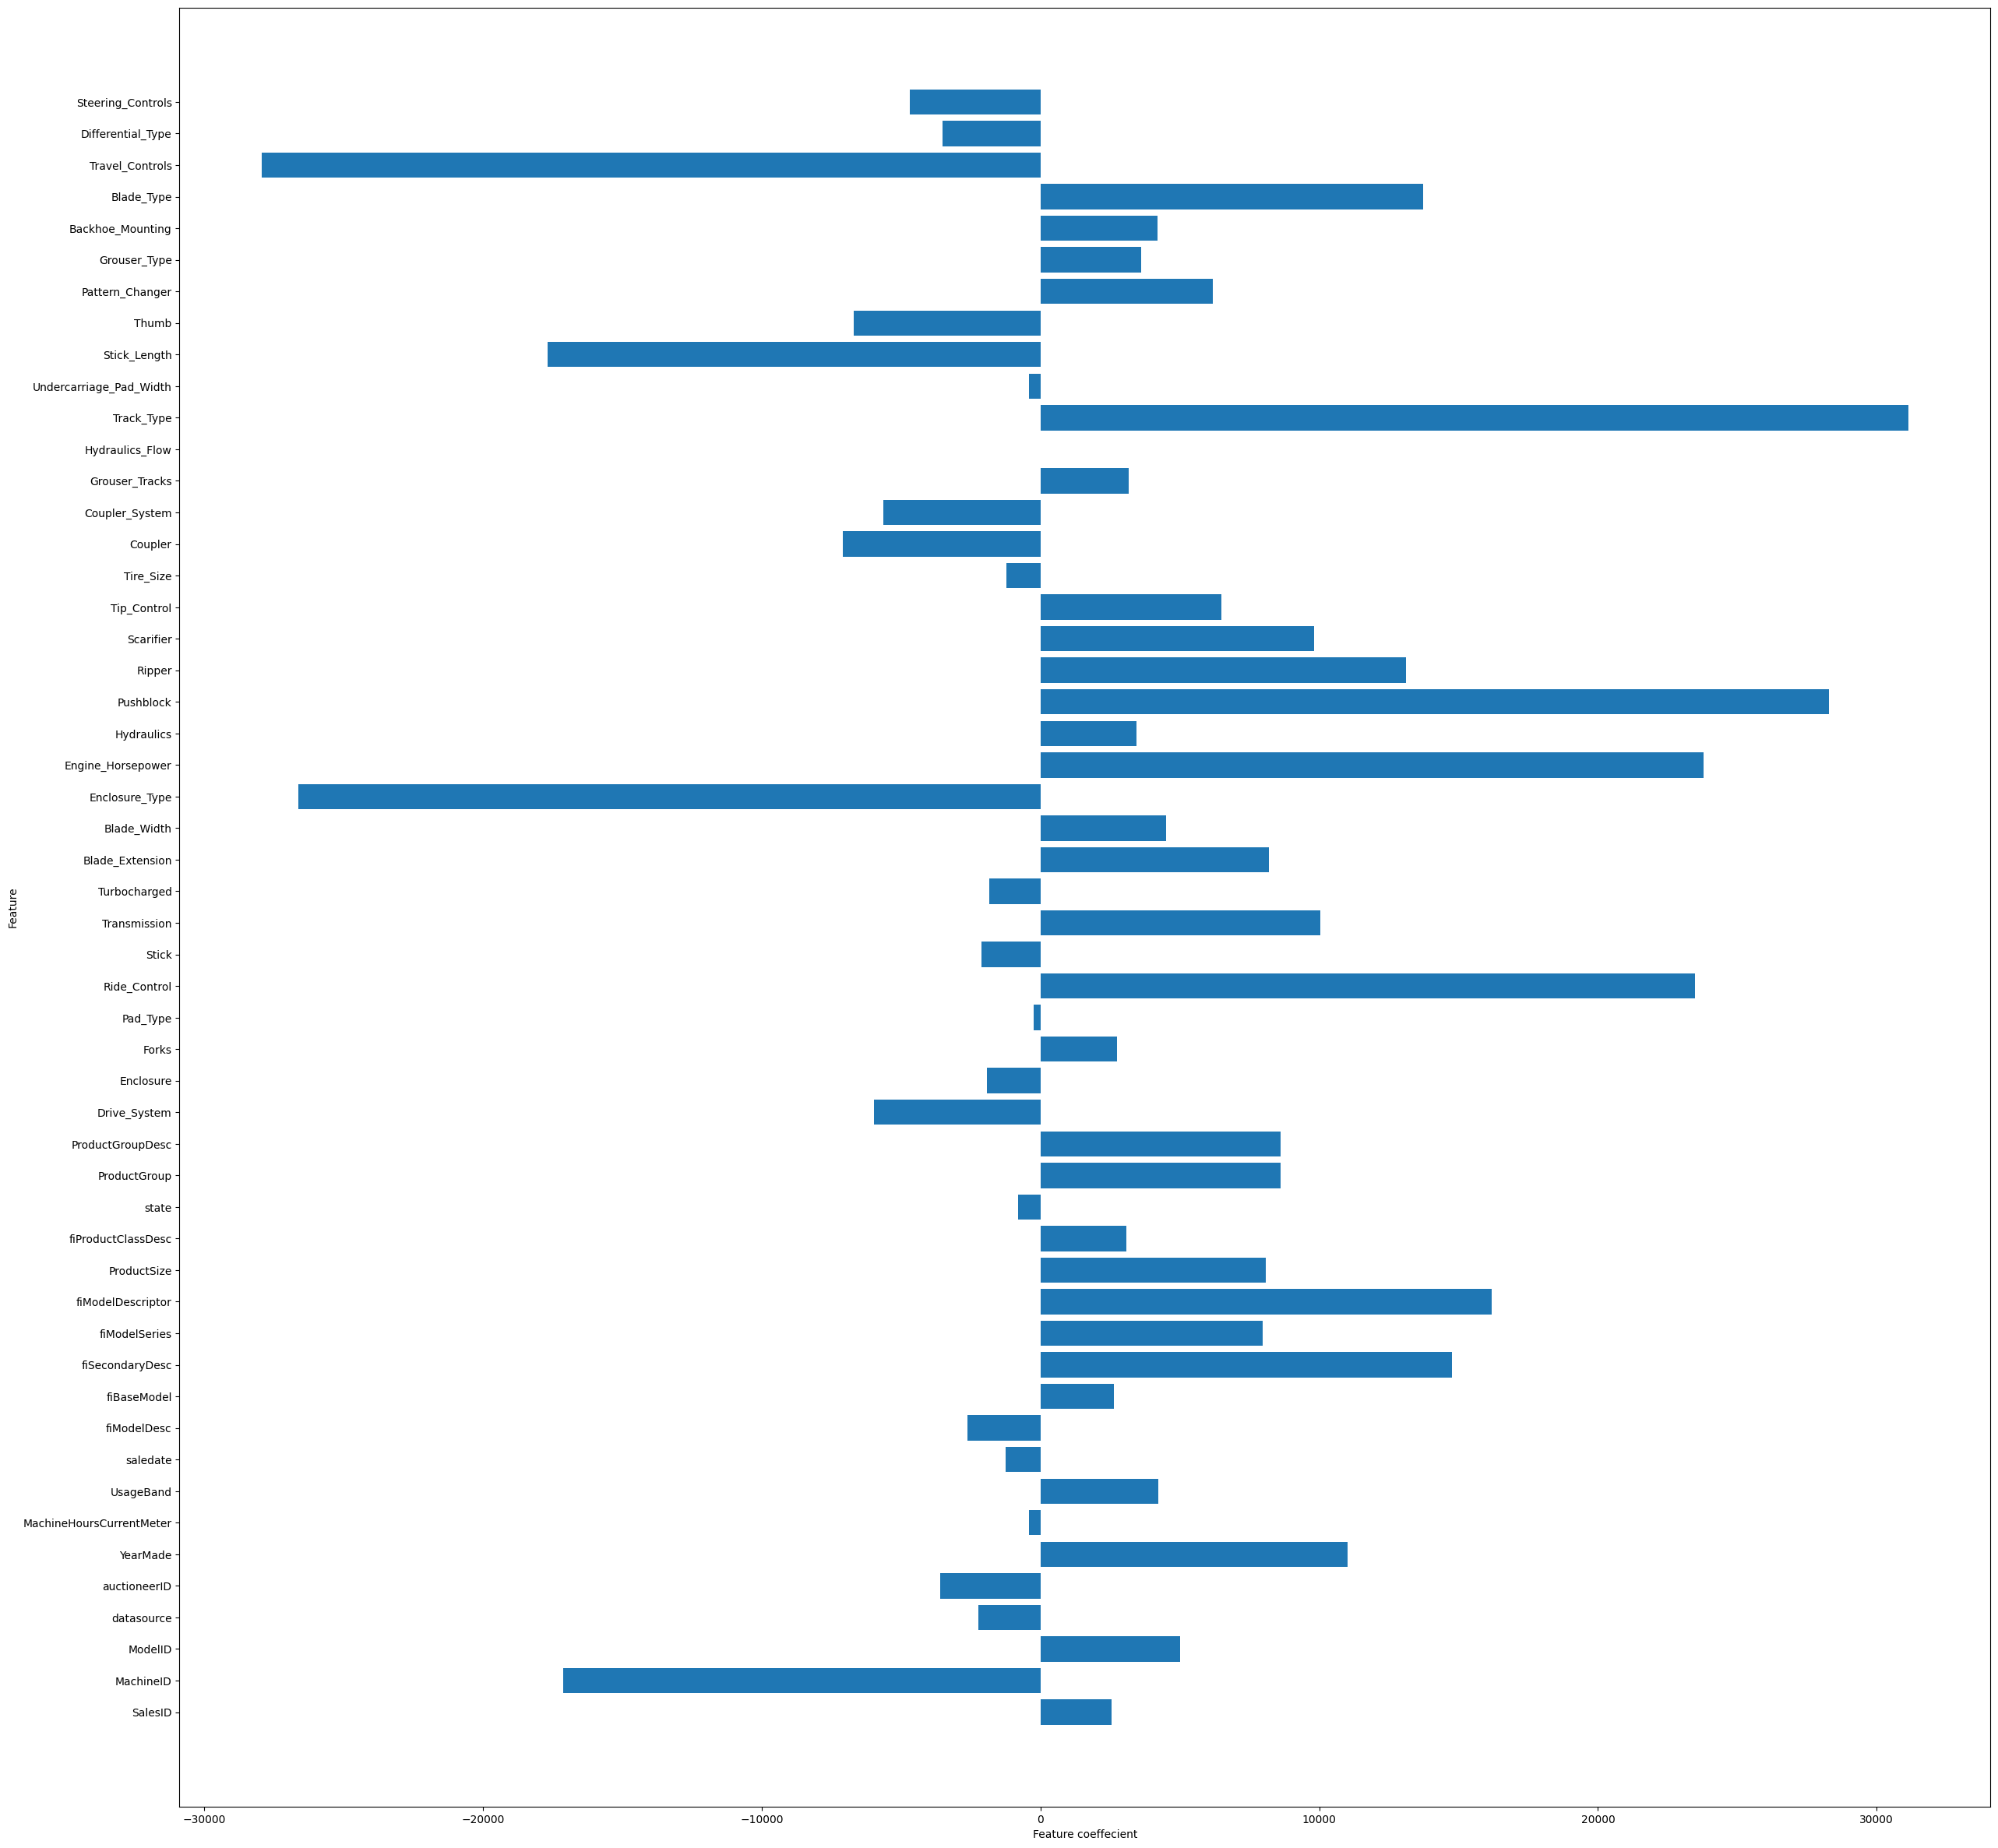

In [20]:
feature_names = X_val.columns
best_coeffs = coeffs[r2_best_index]
plt.figure(figsize=(30,30))
plt.barh(feature_names, best_coeffs)
plt.xlabel("Feature coeffecient")
plt.ylabel("Feature")
print("Feature importance chart")

Owing to the large number of features, it is difficult to exactly determine why the coeffecients for different features are what they are in the chart. It might be smart to do some feature reduction/selection.

## Lasso Regression

Lasso Regression has an inherent feature selection property. It tends to shrink the coefficients of less important features to exactly zero. This makes Lasso useful when dealing with datasets with a large number of features, helping to identify and remove irrelevant features. Since our dataset has many features Lasso might be a good idea. Lasso regression also allows for coeffecients to shrink to zero thus allowing for extreme feature selection. I will be going over a range of alphas [0.1 - 1000] in order to find the optimal alpha. Alpha is a constant that multiplies the L1 term, controlling regularization strength.

### Training and Evaluation

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

r2_vals = []
mae_vals = []
alphas = np.logspace(-1, 3, 20)
coeffs = []
# Finding best alpha
for alpha in alphas:
  lasso = Lasso(alpha)
  lasso.fit(X_train, y_train)
  predicted_val = lasso.predict(X_val)
  r2_vals.append(r2_score(y_val, predicted_val))
  mae_vals.append(mean_absolute_error(y_val, predicted_val))
  coeffs.append(lasso.coef_)

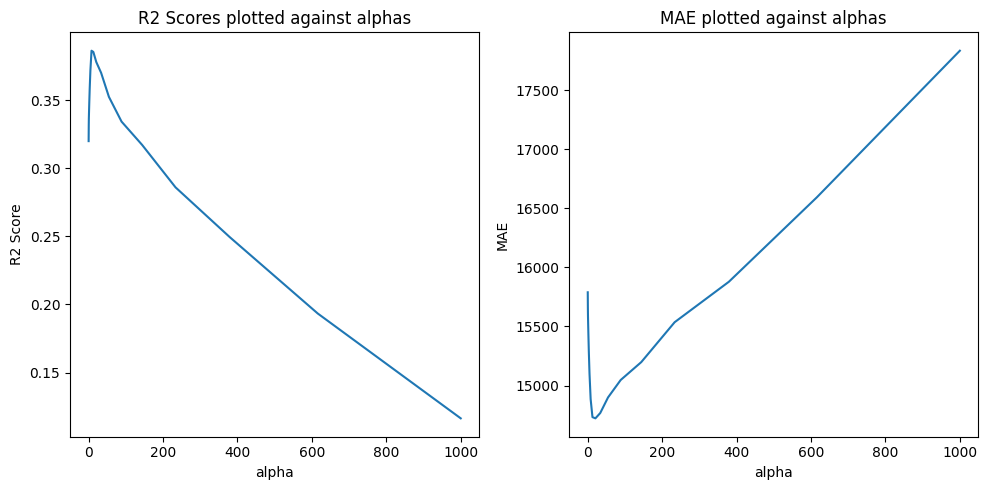

Best alpha:  7.847599703514611
Best r2: 0.38629297636322757
Best mae: 14722.327035013579


In [22]:
# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, r2_vals, label='R2 Scores')
plt.xlabel("alpha")
plt.ylabel("R2 Score")
plt.title("R2 Scores plotted against alphas")

plt.subplot(1, 2, 2)
plt.plot(alphas, mae_vals, label='MAE')
plt.xlabel("alpha")
plt.ylabel("MAE")
plt.title("MAE plotted against alphas")

plt.tight_layout()
plt.show()
r2_best_lasso = max(r2_vals)
r2_best_index = r2_vals.index(r2_best_lasso)
mae_best_lasso = min(mae_vals)
mae__best_index = mae_vals.index(mae_best_lasso)
alpha_best_lasso = alphas[r2_best_index]
print("Best alpha: ", alpha_best_lasso)
print("Best r2:", r2_best_lasso)
print("Best mae:", mae_best_lasso)

### Feature Importance Chart

Feature importance chart


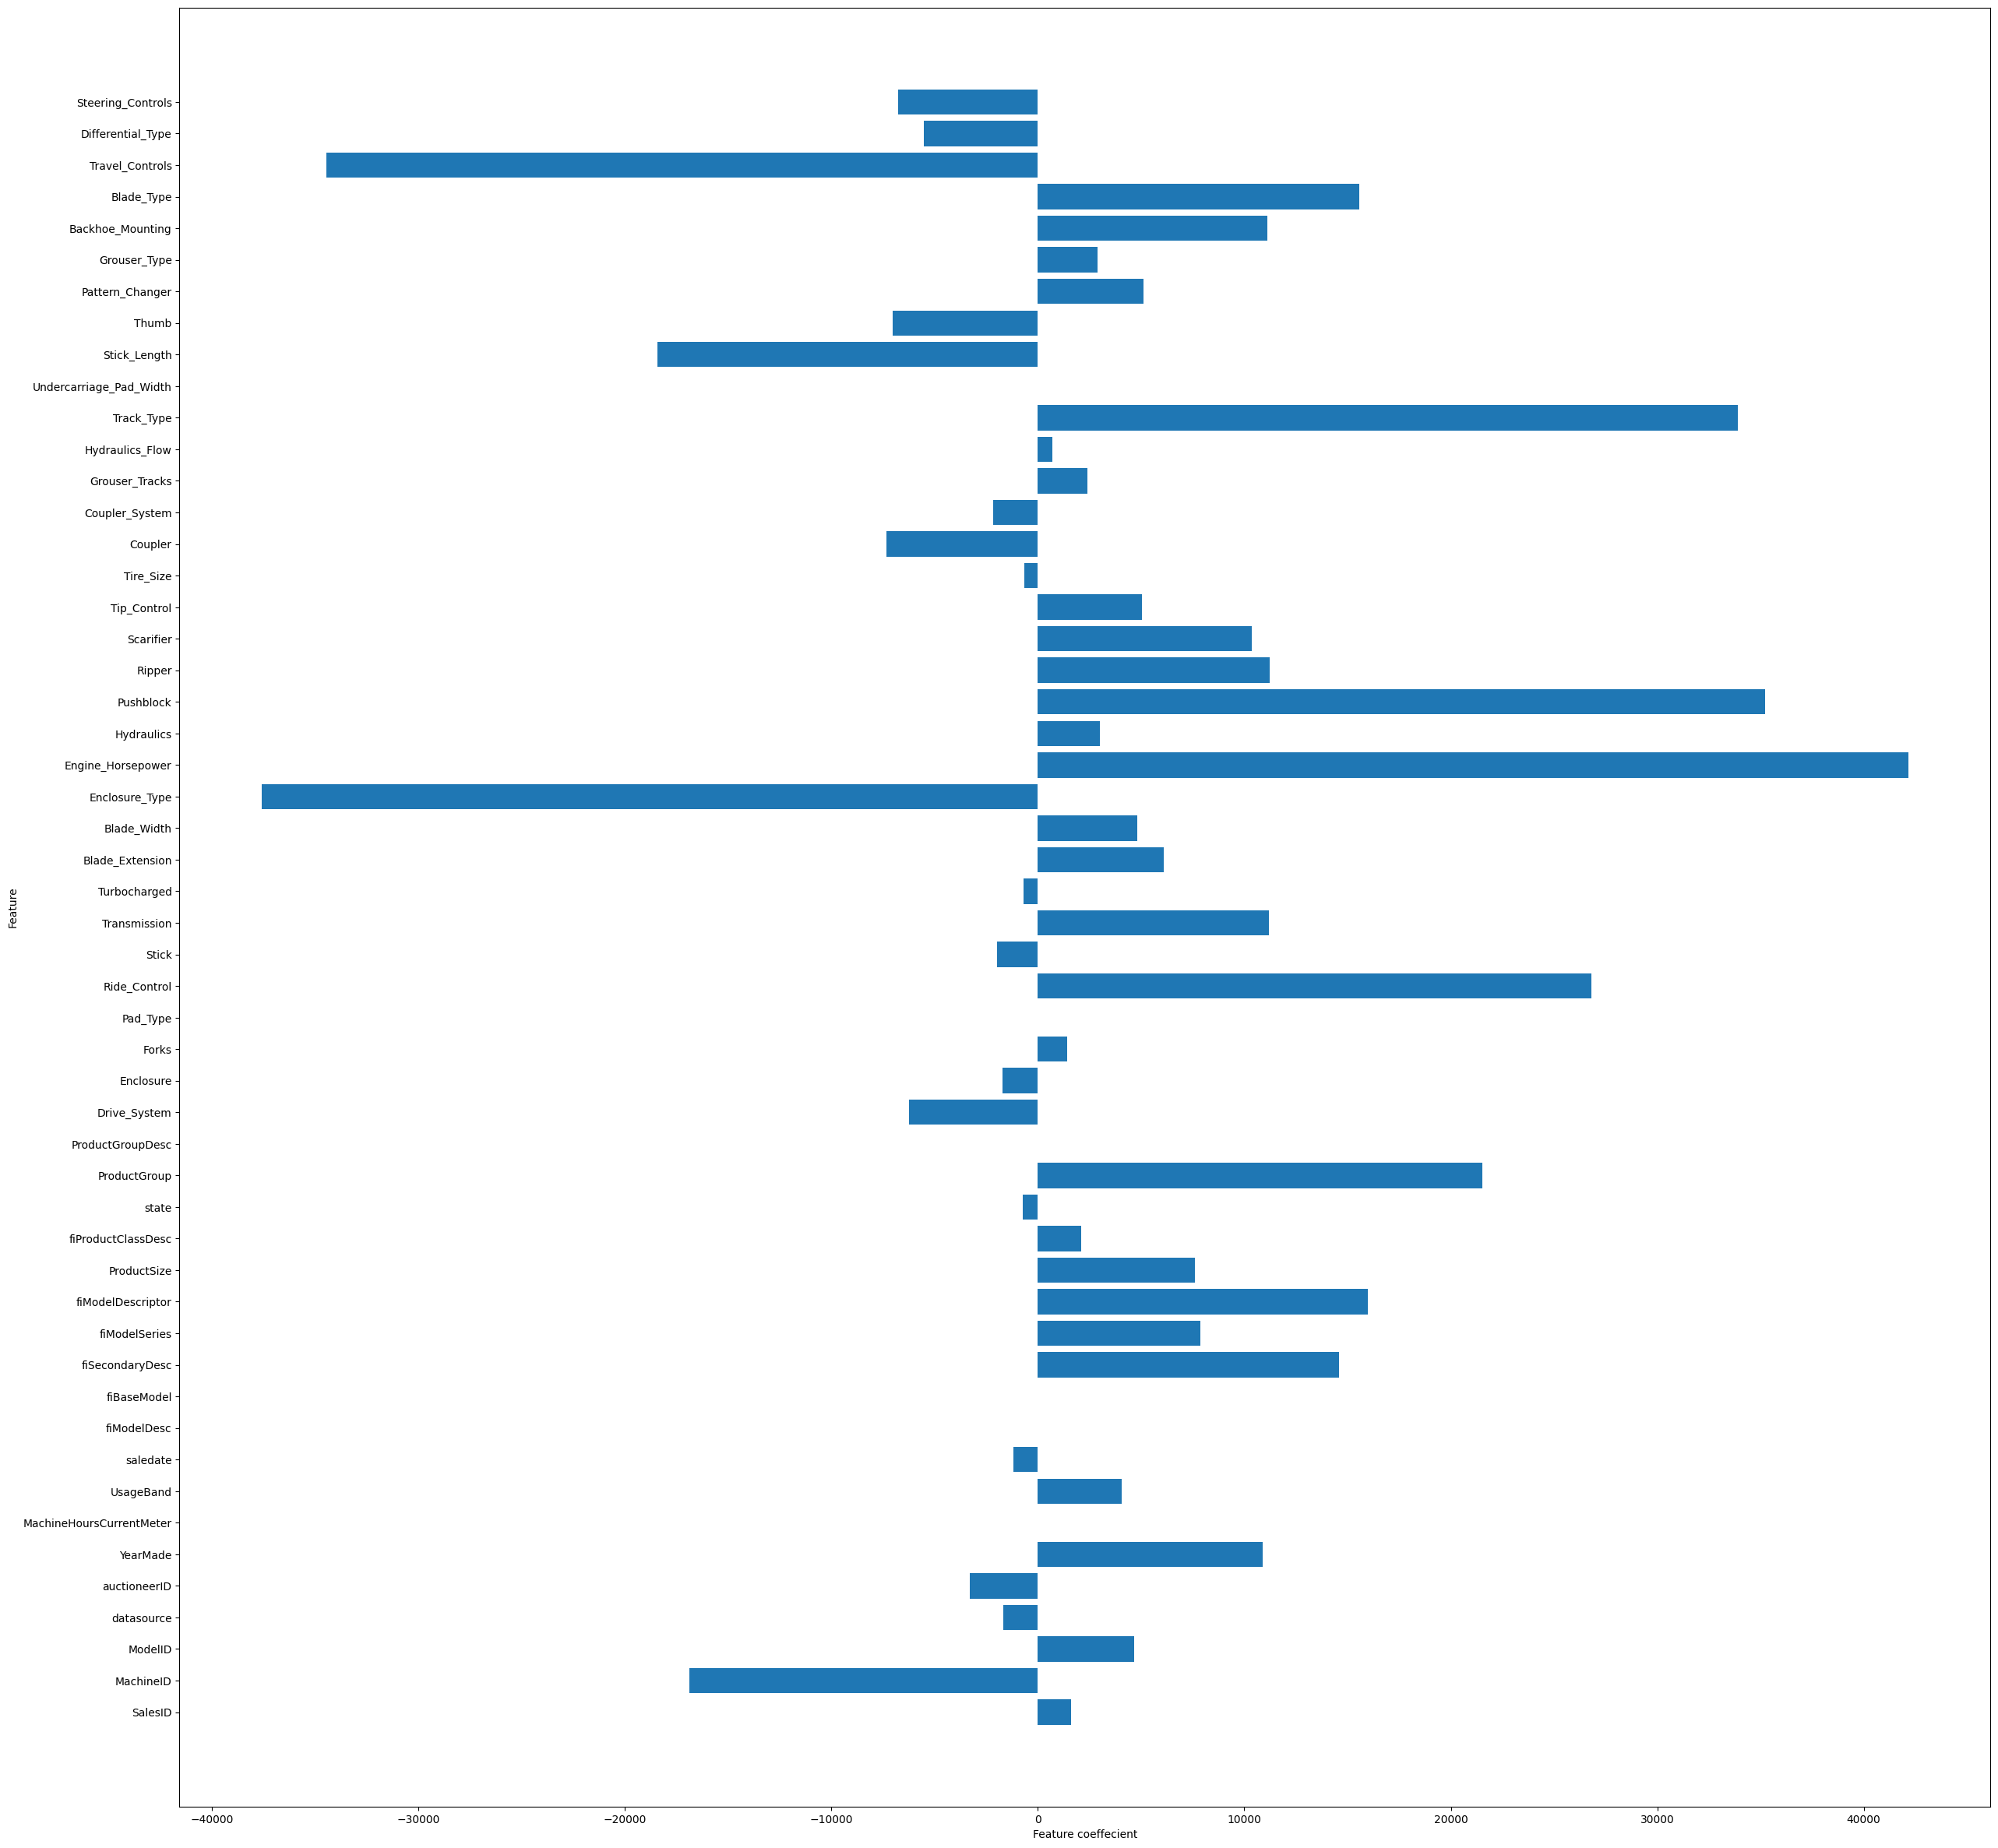

In [23]:
feature_names = X_val.columns
best_coeffs = coeffs[r2_best_index]
plt.figure(figsize=(30,30))
plt.barh(feature_names, best_coeffs)
plt.xlabel("Feature coeffecient")
plt.ylabel("Feature")
print("Feature importance chart")

## ElasticNet Regression

Elastic Net is a regularization technique that combines both Lasso (L1 regularization) and Ridge (L2 regularization) penalties in the linear regression objective function. The combination of L1 and L2 regularization allows Elastic Net to enjoy the benefits of both methods. L1 helps with sparse feature selection, while L2 helps with dealing with multicollinearity and stabilizing coefficients.

Similar to before, I will be finding the optimal hyperparameters, alpha (Constant that multiplies the penalty terms) and l1_ratio(The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2).

### Training and Evaluation

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

r2_vals = []
mae_vals = []
alphas = np.logspace(-1, 3, 10)
l1s = values = np.linspace(0, 1, 10)
coeffs = []
# Finding best alpha and l1
for alpha in alphas:
  for l1 in l1s:
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1)
    elasticnet.fit(X_train, y_train)
    predicted_val = elasticnet.predict(X_val)
    r2_vals.append(r2_score(y_val, predicted_val))
    mae_vals.append(mean_absolute_error(y_val, predicted_val))
    coeffs.append(elasticnet.coef_)

In [28]:
r2_best_en = max(r2_vals)
r2_best_index = r2_vals.index(r2_best_en)
mae_best_en = min(mae_vals)
mae_best_index = mae_vals.index(mae_best_en)
l1_best = l1s[round(r2_best_index/10)]
alpha_best = alphas[r2_best_index//10]
print("Best Alpha:", alpha_best)
print("Best l1_ratio:", l1_best)
print("Best r2:", r2_best_en)
print("Best MAE:", mae_best_en)

Best Alpha: 16.68100537200059
Best l1_ratio: 0.6666666666666666
Best r2: 0.37946434839968124
Best MAE: 14721.398582197267


# Regression Comparison

In [27]:
data = {
    'Linear Regression Model': ['Simple', 'Ridge', 'Elastic Net', 'Lasso'],
    'R2': [r2_lin,r2_best_ridge, r2_best_en, r2_best_lasso, ],
    'MAE': [mae_lin, mae_best_ridge, mae_best_en, mae_best_lasso, ]
}

pd.DataFrame(data)

,Linear Regression Model,R2,MAE
0,Simple,0.318541,15795.083880
1,Ridge,0.390847,14658.941828
2,Elastic Net,0.379464,14721.398582
3,Lasso,0.386293,14722.327035


All regression approaches seem to be give fairly similar results with ridge/lasso being a bit better than simple linear regression. The slight improvement in r2 score for ridge/lasso may be attributed to the fact that ridge and lasso regression introduce regularization terms that penalize large coefficients. This penalty helps prevent overfitting by discouraging the model from fitting noise in the training data. Simple linear regression, lacking regularization, is more prone to overfitting, especially when dealing with a large number of features (which can be considered is the case for us). The marginally better performance of ridge compared to lasso may be attributed to it's greater robustness to outliers. I believe filling in numeric missing values with the mean is not the best choice as it is the main source of outliers, the numeric values, especially MachineHourCurrentMeter, have a mean that is not the best choice for imputation and can be more of an outlier when looking at the spread of the data (further explored in extensive preprocessing approach). For this reason, it may be that because in ridge owing to its sum of squared coeffecient penalty, outliers greatly grow/shrink the penalty allowing for ridge to be more robust to outliers and thus outperforming lasso in this case.
Overall the r2 results for all approaches are in the moderate category and further approaches need to be looked at for improvement.

# Test Set Prediction Using Best Linear Regression Model

In [31]:
print("Final predictions on test data using best best model:")
ridge = Ridge(alpha_best_ridge)
ridge.fit(X_train, y_train)
predicted_vals = ridge.predict(X_test)
X_test_with_sales_price = pd.DataFrame(predicted_vals, columns=["SalePrice"])
X_test_with_sales_price = pd.concat([X_test_with_sales_price, test_csv], axis = 1)
X_test_with_sales_price


Final predictions on test data using best best model:


,SalePrice,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,24819.162791,1227829,1006309,3168,121,3,1999,3688.0000,1,52,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,27849.266078,1227844,1022817,7271,121,3,1000,28555.0000,0,36,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1
2,47771.142137,1227847,1031560,22805,121,3,2004,6038.0000,2,36,...,16,16,1,0,0,-1,-1,-1,-1,-1
3,53970.525058,1227848,56204,1269,121,3,2006,8940.0000,0,36,...,16,19,1,1,1,-1,-1,-1,-1,-1
4,32722.128862,1227863,1053887,22312,121,3,2005,2286.0000,1,36,...,-1,-1,-1,-1,-1,0,3,4,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,23104.324586,6643171,2558317,21450,149,2,2008,19846.7783,-1,11,...,16,19,2,0,0,-1,-1,-1,-1,-1
12453,34893.773113,6643173,2558332,21434,149,2,2005,19846.7783,-1,11,...,16,19,2,0,0,-1,-1,-1,-1,-1
12454,24111.279320,6643184,2558342,21437,149,2,1000,19846.7783,-1,11,...,16,19,2,0,0,-1,-1,-1,-1,-1
12455,35032.662633,6643186,2558343,21437,149,2,2006,19846.7783,-1,11,...,16,19,2,0,0,-1,-1,-1,-1,-1
